In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
from pathlib import Path
from scipy.signal import argrelmax

def plt_style_dark():
    plt.style.use('dark_background')

    plt.rc('font', size=12)
    plt.rcParams["font.family"] = "DejaVu Serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "cm"

def plt_style_def():
    plt.style.use('default')

    plt.rc('font', size=12)
    plt.rcParams["font.family"] = "DejaVu Serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "cm"

plt_style_def()

In [2]:
log = np.load('./diagnostics/f_xi_00000.00.npz')

In [3]:
arg = argrelmax(log['Ez'])[0]

xi_max = log['xi'][arg]
Ez_max = log['Ez'][arg]

Text(0.5, 0, '$-\\xi\\omega_{p}/c$')

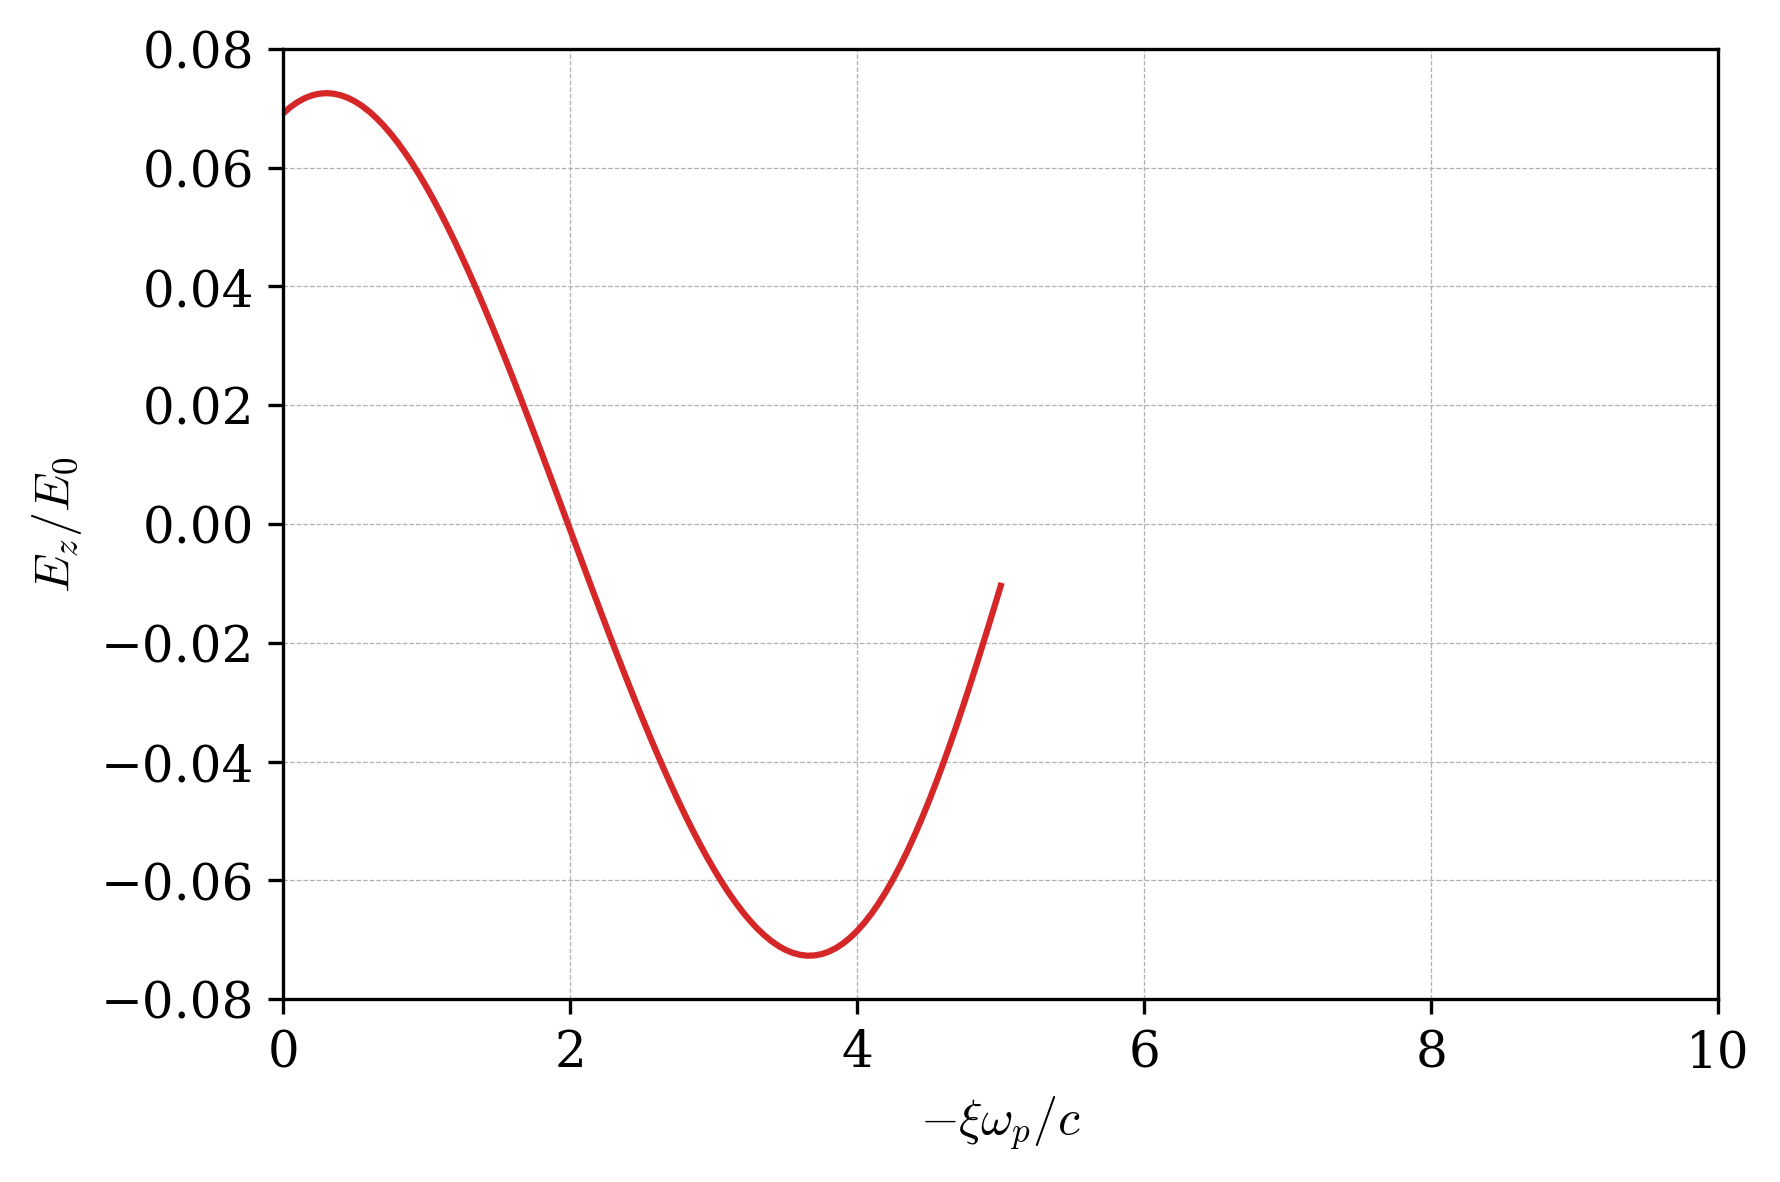

In [4]:
# plt.figure(figsize=(19.2/2, 8/2), dpi=700)
cm = 1/2.54
plt.figure(figsize=(15.675*cm, 15.675*2/3*cm), dpi=300)
plt.xlim(0, 10)
plt.ylim(-0.08, 0.08)

# plt.rcParams['axes.axisbelow'] = True
plt.grid(which='both', linestyle='--', linewidth=.3)

plt.plot(-xi_max, Ez_max, lw=1.5, color='tab:red')
plt.plot(-log['xi'], log['Ez'], lw=1.5, color='tab:red')

plt.ylabel(r'$E_{z}/E_{0}$')
plt.xlabel(r'$-\xi\omega_{p}/c$')

# plt.plot([0, 3000], [0.07532376924, 0.07532376924], lw=1.5, color='tab:pink', label='Theory')
# font = font_manager.FontProperties(family='Times New Roman') #, size=10)

# plt.legend(prop = font, fontsize=10, loc=2) #, font='TimesNewRoman')
# plt.legend(fontsize=10, loc=1)

# plt.savefig('wave_amplitude.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [5]:
cmap = np.load('./diagnostics/colormaps_00000.00.npz')

print(list(cmap.keys()))

['Ez', 'rho', 'xi', 'transverse_grid']


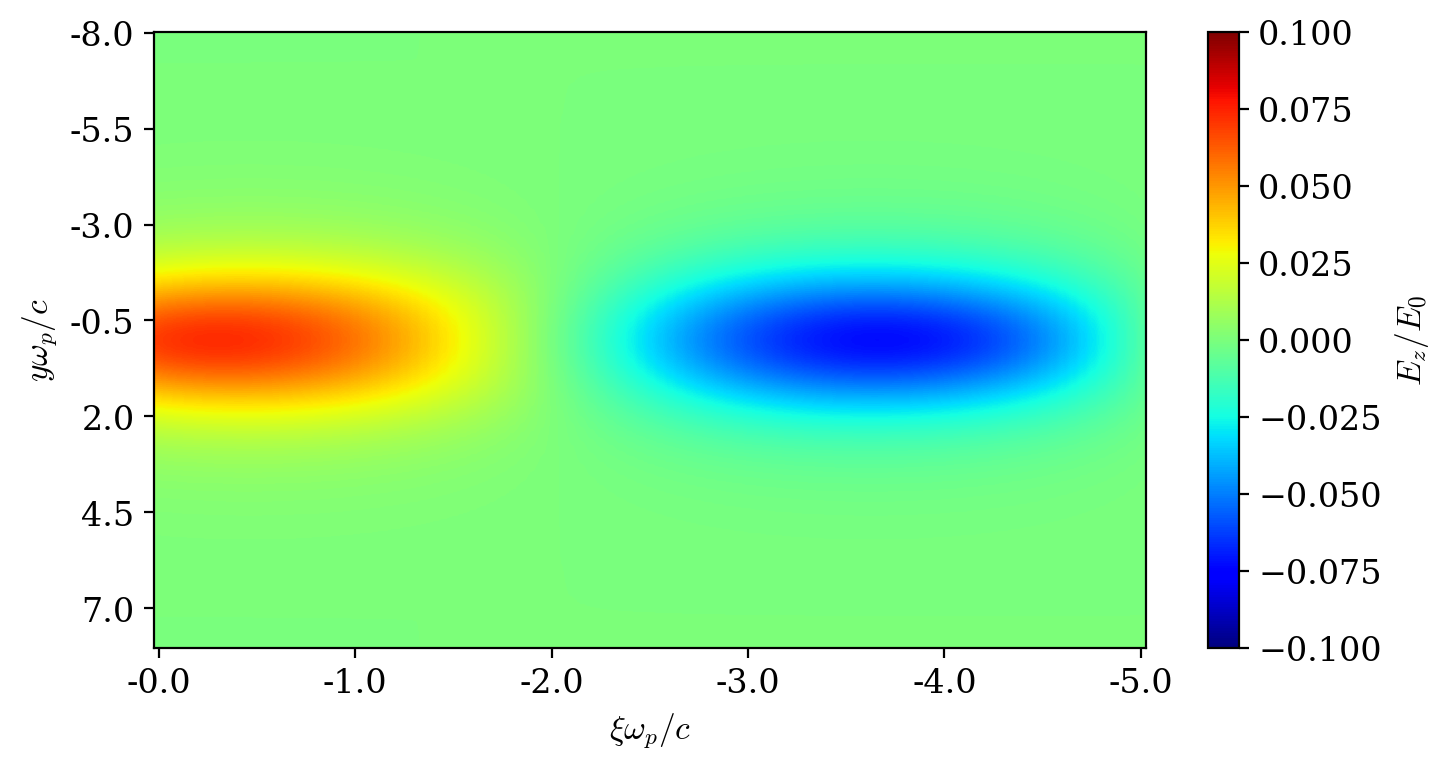

In [6]:
fig = plt.figure(figsize=(8, 4), dpi=200)
cmap_Ez = (cmap['Ez'].T)
plt.imshow(cmap_Ez, cmap='jet', vmin=-0.1, vmax=0.1, aspect='auto')

ticks_locations, _ = plt.xticks()
new_ticks = [
    cmap['xi'][int(i)] for i in ticks_locations[1:-1]]
plt.xticks(ticks_locations[1:-1], new_ticks)

ticks_locations, _ = plt.yticks()
new_ticks = [
    cmap['transverse_grid'][int(i)] for i in ticks_locations[1:-1]]
plt.yticks(ticks_locations[1:-1], new_ticks)

plt.xlabel(r'$\xi \omega_{p}/c$')
plt.ylabel(r'$y \omega_{p}/c$')

plt.colorbar(label='$E_z/E_0$', orientation="vertical")

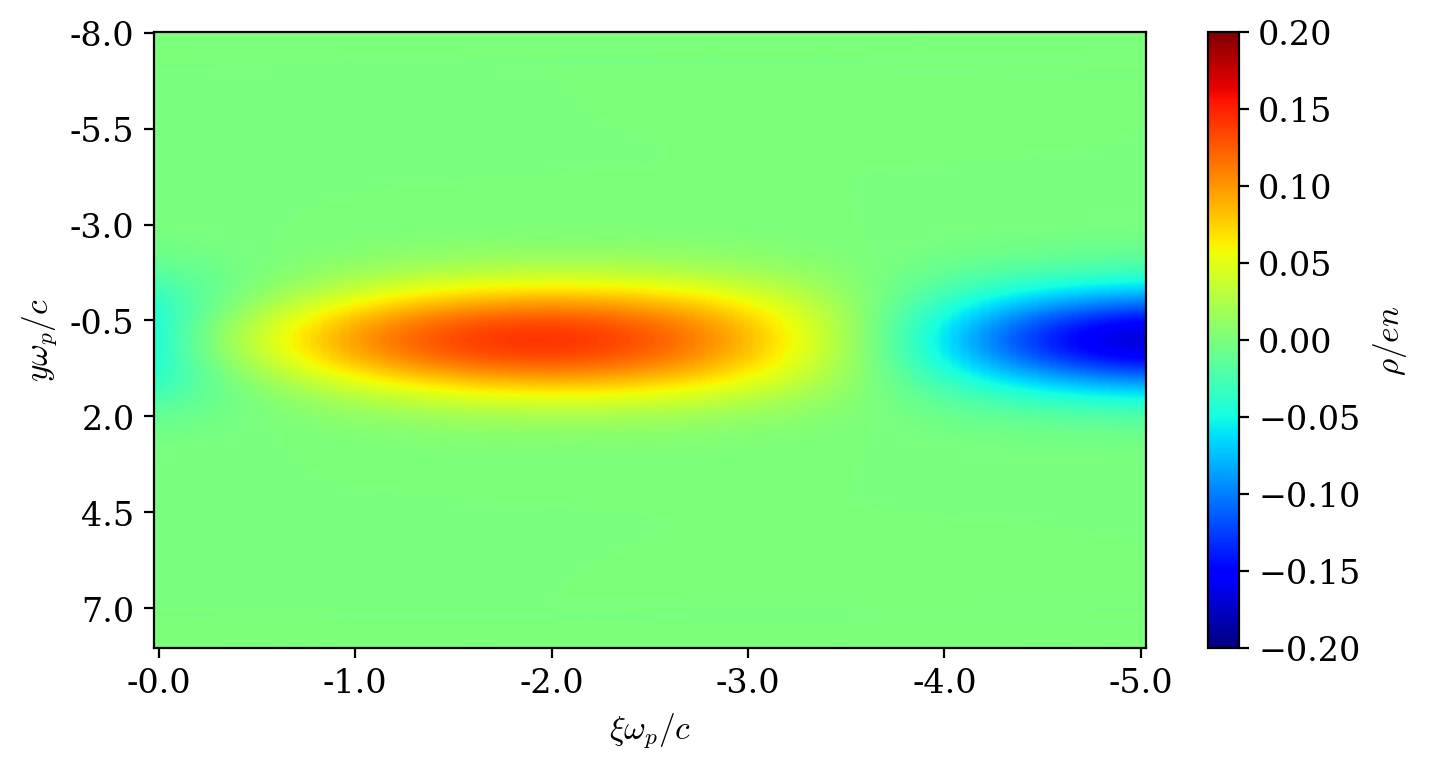

In [7]:
fig = plt.figure(figsize=(8, 4), dpi=200)
cmap_rho = (cmap['rho']).T
plt.imshow(cmap_rho, cmap='jet', vmin=-0.2, vmax=0.2, aspect='auto')

ticks_locations, _ = plt.xticks()
new_ticks = [
    cmap['xi'][int(i)] for i in ticks_locations[1:-1]]
plt.xticks(ticks_locations[1:-1], new_ticks)

ticks_locations, _ = plt.yticks()
new_ticks = [
    cmap['transverse_grid'][int(i)] for i in ticks_locations[1:-1]]
plt.yticks(ticks_locations[1:-1], new_ticks)

plt.xlabel(r'$\xi \omega_{p}/c$')
plt.ylabel(r'$y \omega_{p}/c$')

plt.colorbar(label='$\\rho / e n$', orientation="vertical")

In [8]:
transverse = np.load('./diagnostics/transverse_00000.00_-00005.00.npz')

print(list(transverse.keys()))

['transverse_grid', 'rho', 'x_offt', 'y_offt']


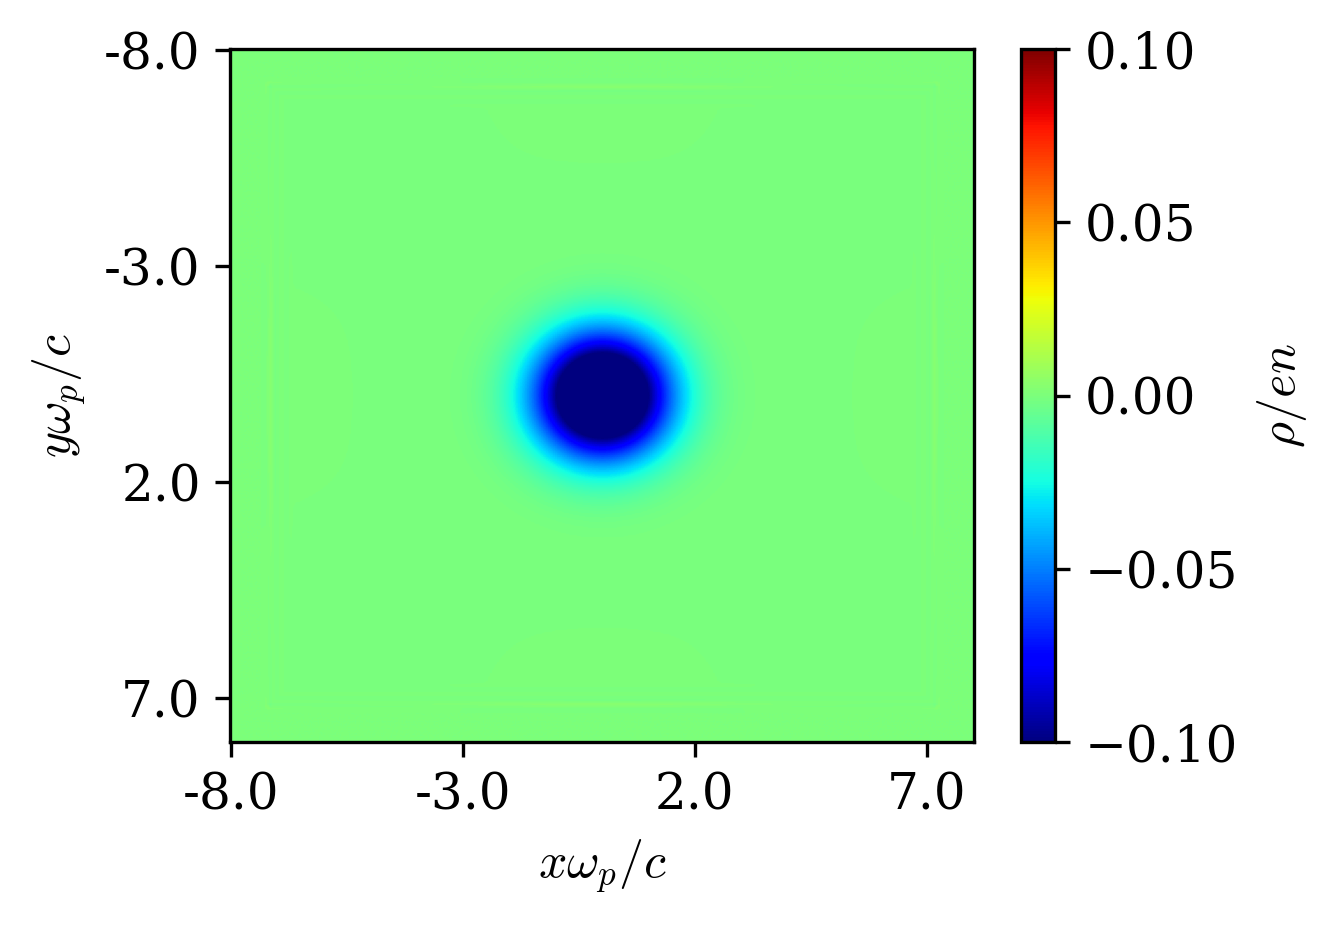

In [9]:
fig = plt.figure(figsize=(4, 3), dpi=300)
plt.imshow(transverse['rho'].T, cmap='jet', vmin=-0.1, vmax=0.1, aspect='auto')

ticks_locations, _ = plt.xticks()
new_ticks = [
    transverse['transverse_grid'][int(i)] for i in ticks_locations[1:-1]]
plt.xticks(ticks_locations[1:-1], new_ticks)
plt.yticks(ticks_locations[1:-1], new_ticks)

plt.xlabel(r'$x \omega_{p}/c$')
plt.ylabel(r'$y \omega_{p}/c$')

plt.colorbar(label='$\\rho / e n$', orientation="vertical")